# ANÁLISIS EXPLORATORIO DE DATOS

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [3]:
eda = pd.read_csv('Wine_reviews_climate_prediction.csv')

In [4]:
eda.head(2)

,Unnamed: 0,country,description,points,price,taster_name,variety,winery,Year,region,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
0,0,Portugal,This is ripe and fruity a wine that is smooth ...,87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro,41.453397,-5.125201,41.25,-5.25,13.1,19.7,6.57,298.7,1206
1,1,Portugal,Strong tannins dominate this wine. It comes fr...,85,NaN,Roger Voss,Portuguese Red,Quinta do Filoco,2011,Douro,41.453397,-5.125201,41.25,-5.25,13.1,19.7,6.57,298.7,1206


In [5]:
eda.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
eda.describe()

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
count,65838.000000,60311.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000
mean,88.352897,37.008655,2009.080956,32.945216,-38.770990,32.974764,-38.782542,12.944409,18.396368,7.535872,820.700068,1013.109040
std,3.161727,42.113959,2.616905,24.915822,67.148066,24.929384,67.147257,3.551747,3.868834,3.749604,402.676102,232.051532
min,80.000000,4.000000,2000.000000,-45.129986,-124.764732,-45.250000,-124.750000,-0.630000,1.990000,-6.620000,0.000000,351.000000
25%,86.000000,18.000000,2007.000000,37.123224,-118.339346,37.250000,-118.250000,10.980000,16.150000,5.830000,573.400000,864.000000
50%,88.000000,28.000000,2010.000000,41.213798,-6.047443,41.250000,-6.250000,13.280000,18.340000,7.200000,758.500000,1008.000000
75%,91.000000,45.000000,2011.000000,45.344425,7.942845,45.250000,7.750000,14.480000,20.530000,9.590000,992.600000,1176.000000
max,100.000000,2500.000000,2012.000000,59.941208,178.356201,59.750000,178.250000,28.650000,34.900000,24.310000,4114.000000,2370.000000


In [110]:
eda.price.median()

28.0

In [108]:
eda.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999]).T

,0.250,0.500,0.750,0.900,0.950,0.990,0.999
points,86.000000,88.000000,91.000000,93.000000,94.000000,95.000000,98.000000
price,18.000000,28.000000,45.000000,69.000000,90.000000,160.000000,492.210000
Year,2007.000000,2010.000000,2011.000000,2012.000000,2012.000000,2012.000000,2012.000000
Latitude,37.123224,41.213798,45.344425,48.046335,49.354905,53.139881,54.653801
Longitude,-118.339346,-6.047443,7.942845,14.958644,28.177500,151.312067,175.088401
Lat_x,37.250000,41.250000,45.250000,48.250000,49.250000,53.250000,54.750000
Long_x,-118.250000,-6.250000,7.750000,14.750000,28.250000,151.250000,175.250000
temp_anual,10.980000,13.280000,14.480000,16.410000,18.100000,26.380000,28.210000
temp_max_anual,16.150000,18.340000,20.530000,22.410000,24.300000,31.388900,34.400000
temp_min_anual,5.830000,7.200000,9.590000,11.590000,13.230000,22.070000,23.240000


In [7]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65838 entries, 0 to 65837
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         65838 non-null  object 
 1   description     65838 non-null  object 
 2   points          65838 non-null  int64  
 3   price           60311 non-null  float64
 4   taster_name     65838 non-null  object 
 5   variety         65838 non-null  object 
 6   winery          65838 non-null  object 
 7   Year            65838 non-null  int64  
 8   region          65838 non-null  object 
 9   Latitude        65838 non-null  float64
 10  Longitude       65838 non-null  float64
 11  Lat_x           65838 non-null  float64
 12  Long_x          65838 non-null  float64
 13  temp_anual      65838 non-null  float64
 14  temp_max_anual  65838 non-null  float64
 15  temp_min_anual  65838 non-null  float64
 16  pre_anual       65838 non-null  float64
 17  etp_anual       65838 non-null 

In [114]:
eda.price.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999])

0.250     18.00
0.500     28.00
0.750     45.00
0.900     69.00
0.950     90.00
0.990    160.00
0.999    492.21
Name: price, dtype: float64

(0.0, 160.0)

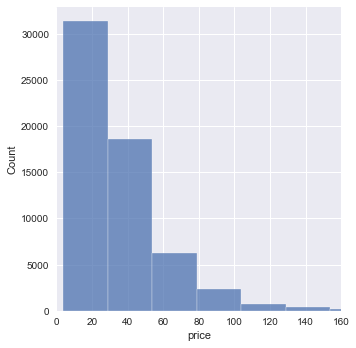

In [111]:
plt.style.use('seaborn')

sns.displot(eda.price, bins = 100);
plt.xlim(0,160)

In [ ]:
#El 99% de los datos los tenemos con un precio inferior a $160

In [117]:
eda.points.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999, 0.99999])

0.25000     86.0
0.50000     88.0
0.75000     91.0
0.80000     91.0
0.90000     93.0
0.95000     94.0
0.99000     95.0
0.99900     98.0
0.99999    100.0
Name: points, dtype: float64

(70.0, 110.0)

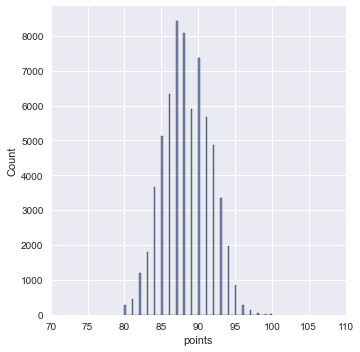

In [96]:
sns.displot(eda.points, bins = 100);
plt.xlim(70,110)

In [143]:
rango = eda.loc[eda['points']>=95]
rango.describe()

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
count,1359.000000,1208.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,95.644592,143.312914,2008.884474,40.716962,-29.150944,40.740434,-29.183039,12.750574,17.870243,7.675092,831.034805,965.567329
std,1.040186,183.481180,2.503438,14.458332,63.132669,14.469901,63.127681,3.010442,3.244359,3.231913,330.517360,202.175443
min,95.000000,20.000000,2000.000000,-35.217262,-123.430534,-35.250000,-123.250000,1.770000,4.650000,-4.320000,122.600000,393.000000
25%,95.000000,62.000000,2007.000000,39.115829,-89.642979,39.250000,-89.750000,11.020000,15.910000,5.995000,629.200000,828.000000
50%,95.000000,88.000000,2009.000000,44.449500,-0.672885,44.250000,-0.750000,13.350000,17.950000,7.240000,791.800000,930.000000
75%,96.000000,144.250000,2011.000000,46.066728,7.942845,46.250000,7.750000,14.140000,19.190000,9.670000,932.700000,1131.000000
max,100.000000,2500.000000,2012.000000,59.941208,151.312067,59.750000,151.250000,27.490000,31.900000,23.240000,2560.700000,2016.000000


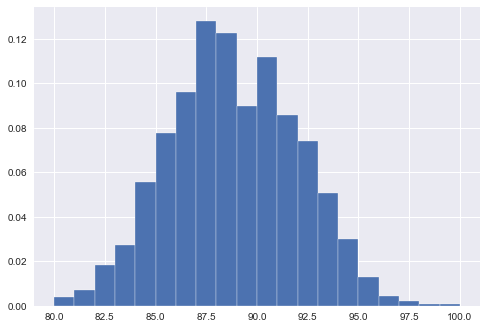

In [155]:
plt.figure()
plt.hist(eda['points'], bins = 20, density=True);


#sns.kdeplot(eda.points);

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points', ylabel='price'>

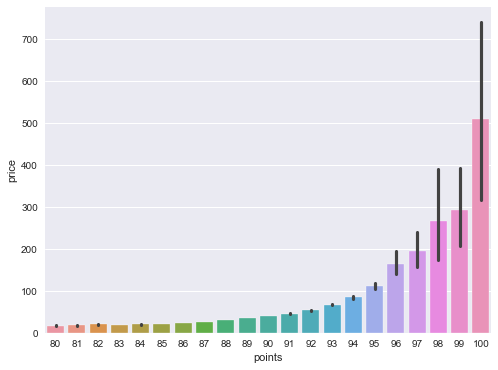

In [162]:
#barplot
plt.figure(figsize=(8, 6))
sns.barplot(eda.points,eda.price, data=eda)
#plt.xlabel("Points", size=14)
#plt.ylabel("LifeExp", size=14)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points', ylabel='price'>

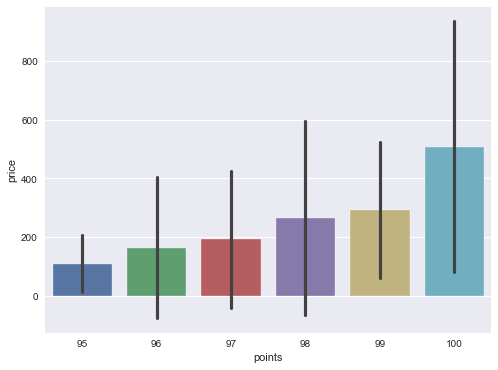

In [164]:
plt.figure(figsize=(8, 6))
sns.barplot(rango.points,rango.price, ci=  'sd', data=rango)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


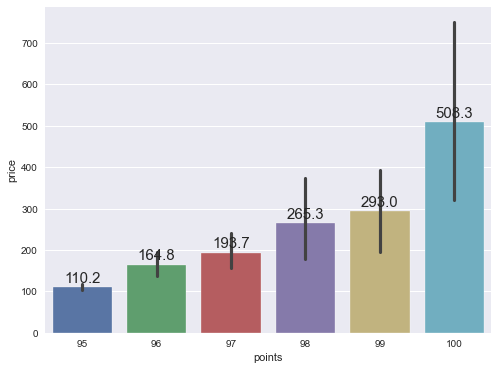

In [167]:
plt.figure(figsize=(8, 6))
splot = sns.barplot(rango.points,rango.price, data=rango)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

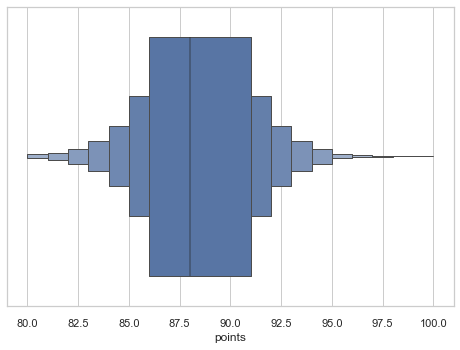

In [104]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxenplot(x=eda["points"])

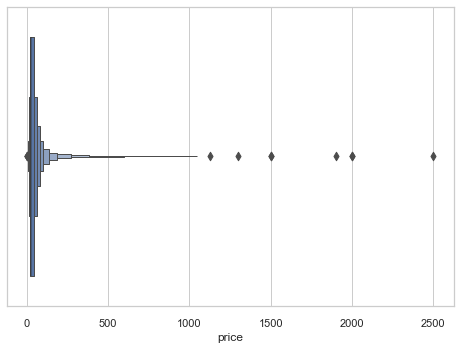

In [105]:
pricex = sns.boxenplot(x=eda["price"])

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

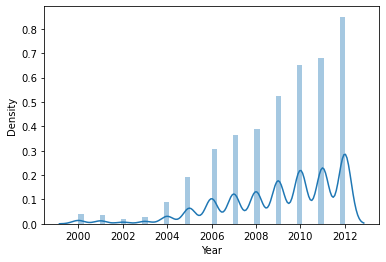

In [10]:
sns.distplot(eda.Year)

[Text(0, 0.5, 'country')]

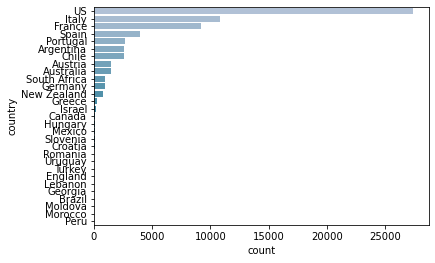

In [11]:
plot_data = eda.groupby('country').filter(lambda x : len(x)>10)
Appellation_Reg = sns.countplot(y="country",
                                data=plot_data, palette="PuBuGn_d", order = plot_data['country'].value_counts().index);
Appellation_Reg.set(ylabel='country')

[Text(0, 0.5, 'taster_name')]

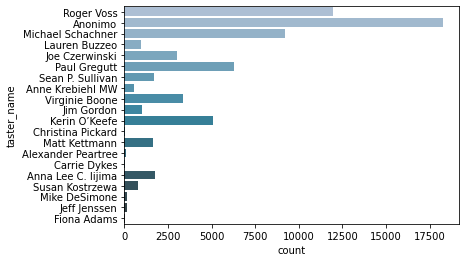

In [12]:
Appellation_Reg = sns.countplot(y="taster_name",  
data=eda, palette="PuBuGn_d");  
Appellation_Reg.set(ylabel='taster_name') 

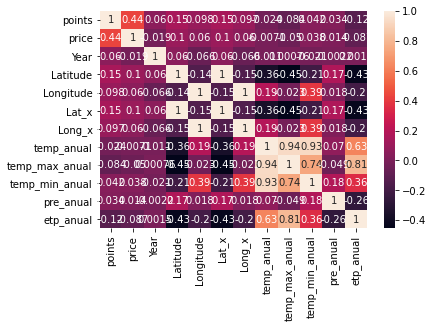

In [13]:
corrMatrix = eda.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [14]:
corrMatrix

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
points,1.000000,0.436009,0.059932,0.152750,0.097693,0.152776,0.097452,-0.023812,-0.084411,0.042031,0.033735,-0.122775
price,0.436009,1.000000,-0.018538,0.103496,0.059879,0.103433,0.059737,-0.007076,-0.049646,0.037607,0.013966,-0.087069
Year,0.059932,-0.018538,1.000000,0.060108,-0.066282,0.060241,-0.066305,-0.010876,0.000759,-0.021435,-0.002235,0.001491
Latitude,0.152750,0.103496,0.060108,1.000000,-0.144752,0.999985,-0.145218,-0.358238,-0.454592,-0.209942,0.174396,-0.429367
Longitude,0.097693,0.059879,-0.066282,-0.144752,1.000000,-0.145010,0.999997,0.191695,-0.022913,0.387044,0.018355,-0.197699
Lat_x,0.152776,0.103433,0.060241,0.999985,-0.145010,1.000000,-0.145477,-0.358254,-0.454523,-0.210045,0.174686,-0.429255
Long_x,0.097452,0.059737,-0.066305,-0.145218,0.999997,-0.145477,1.000000,0.191828,-0.022668,0.387046,0.018129,-0.197495
temp_anual,-0.023812,-0.007076,-0.010876,-0.358238,0.191695,-0.358254,0.191828,1.000000,0.935254,0.930865,0.069743,0.628763
temp_max_anual,-0.084411,-0.049646,0.000759,-0.454592,-0.022913,-0.454523,-0.022668,0.935254,1.000000,0.741274,-0.049158,0.809914
temp_min_anual,0.042031,0.037607,-0.021435,-0.209942,0.387044,-0.210045,0.387046,0.930865,0.741274,1.000000,0.182636,0.356104


In [15]:
#pd.plotting.scatter_matrix(eda, alpha = 0.3, figsize = (15,15), diagonal = 'kde');

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Latitude', ylabel='Density'>

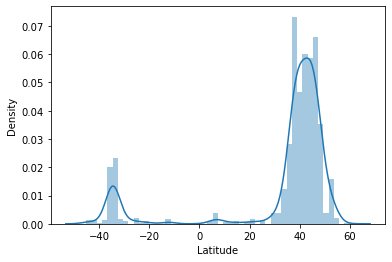

In [16]:
sns.distplot(eda.Latitude)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Longitude', ylabel='Density'>

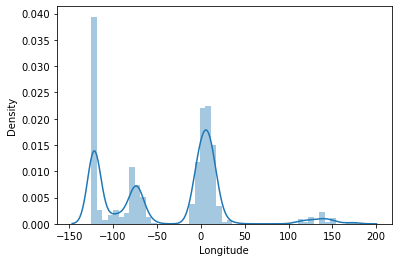

In [17]:
sns.distplot(eda.Longitude)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp_anual', ylabel='Density'>

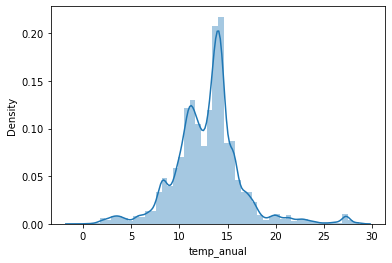

In [18]:
sns.distplot(eda.temp_anual)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp_max_anual', ylabel='Density'>

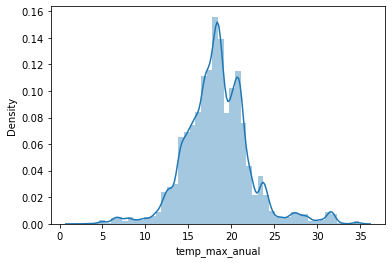

In [19]:
sns.distplot(eda.temp_max_anual)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp_min_anual', ylabel='Density'>

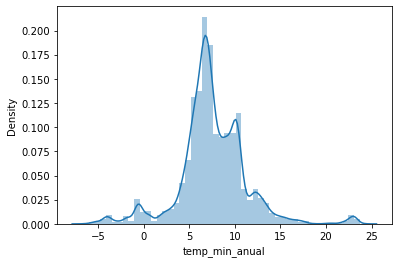

In [20]:
sns.distplot(eda.temp_min_anual)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='etp_anual', ylabel='Density'>

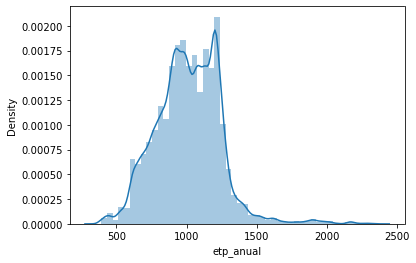

In [21]:
sns.distplot(eda.etp_anual)

In [22]:
plt.style.use('seaborn-whitegrid')

In [23]:
#relacionar poins/price contra latitud y longitud. Cada 2

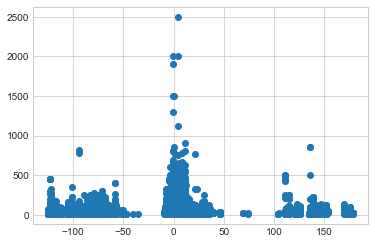

In [40]:
plt.figure()
plt.scatter(X_Latitude, Y_price)

(array([3.000e+00, 1.491e+03, 7.680e+03, 9.199e+03, 7.316e+03, 6.390e+03,
        4.725e+03, 4.442e+03, 3.418e+03, 3.042e+03, 2.405e+03, 1.592e+03,
        1.474e+03, 1.180e+03, 8.380e+02, 1.015e+03, 5.920e+02, 4.900e+02,
        4.890e+02, 3.050e+02, 3.790e+02, 1.160e+02, 1.600e+02, 8.700e+01,
        1.800e+02, 1.910e+02, 1.070e+02, 6.800e+01, 7.900e+01, 6.300e+01,
        1.380e+02, 2.500e+01, 4.000e+01, 4.000e+01, 1.800e+01, 3.800e+01,
        2.300e+01, 9.000e+00, 1.500e+01, 6.300e+01]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 40 artists>)

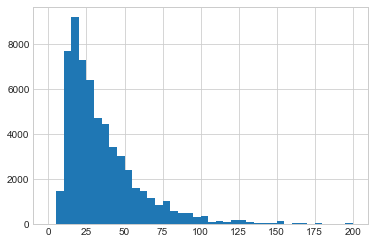

In [52]:
plt.hist(eda['price'], bins=40, range =(0,200) )#,  density=True)

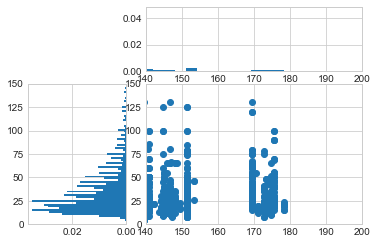

In [79]:
import matplotlib.gridspec as gridspec
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#PRICE VS LONGITUDE
Y_price = eda['price']
X_Longitude = eda['Longitude']

lower_right.scatter(X_Longitude, Y_price)
top_histogram.hist(X_Longitude, bins=100)
s = side_histogram.hist(Y_price, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Longitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_price, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(140, 200)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

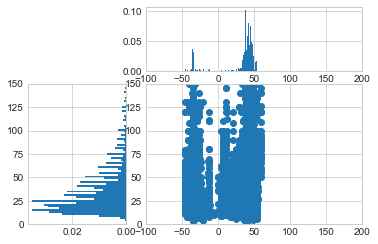

In [60]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#PRICE VS LATITUDE
Y_price = eda['price']
X_Latitude = eda['Latitude']

lower_right.scatter(X_Latitude, Y_price)
top_histogram.hist(X_Latitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Latitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_price, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, 200)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

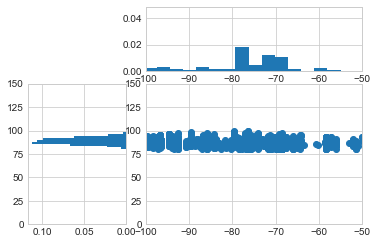

In [75]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#POINTS VS LONGITUDE
Y_points = eda['points']
X_Longitude = eda['Longitude']

lower_right.scatter(X_Longitude, Y_points)
top_histogram.hist(X_Longitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Longitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_points, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, -50)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

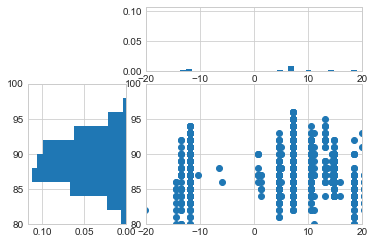

In [77]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#POINTS VS LATITUDE
Y_points = eda['points']
X_Latitude = eda['Latitude']

lower_right.scatter(X_Latitude, Y_points)
top_histogram.hist(X_Latitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Latitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_points, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-20, 20)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(80, 100)

(array([1.580e+02, 3.400e+01, 5.300e+01, 1.120e+02, 1.600e+01, 7.000e+00,
        6.200e+01, 1.180e+02, 2.300e+02, 2.552e+03, 2.135e+03, 1.076e+03,
        3.500e+01, 2.000e+02, 9.900e+01, 4.300e+01, 3.000e+00, 2.000e+00,
        2.330e+02, 5.700e+01, 2.400e+01, 5.000e+00, 0.000e+00, 1.520e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.100e+01,
        3.900e+01, 1.900e+02, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 8.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 1.470e+02,
        0.000e+00, 5.130e+02, 0.000e+00, 0.000e+00, 8.200e+01, 1.300e+01,
        0.000e+00, 3.300e+01, 1.120e+02, 7.000e+00, 2.000e+00, 0.000e+00,
        6.300e+01, 2.000e+00, 9.700e+01, 1.240e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 2.020e+02, 0.000e+00, 7.000e+00, 3.000e+02, 2.460e+02,
        2.820e+02, 2.690e+02, 5.080e+02, 1.201e+03, 1.774e+03, 2.125e+03,
        3.085e+03, 7.045e+03, 2.415e+0

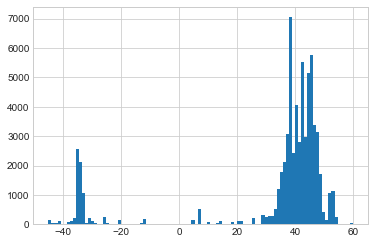

In [69]:
plt.hist(eda['Latitude'], bins=100)

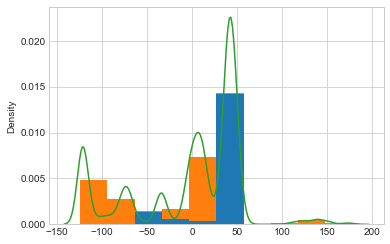

In [39]:
plt.figure()
plt.hist([eda.Latitude, eda.Longitude], histtype='barstacked', density=True);
v3 = np.concatenate(([eda.Latitude, eda.Longitude]))
sns.kdeplot(v3);

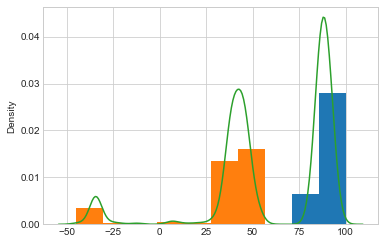

In [73]:
plt.figure()
plt.hist([eda.points, eda.Latitude], histtype='barstacked', density=True);
v3 = np.concatenate(([eda.points, eda.Latitude]))
sns.kdeplot(v3);

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


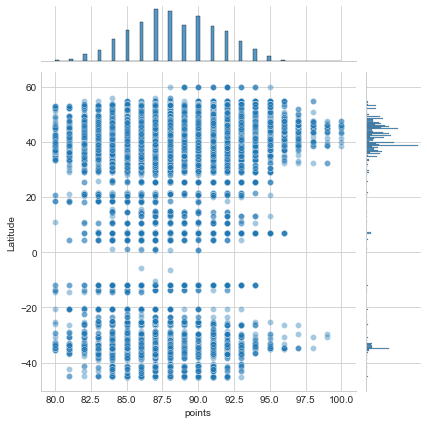

In [70]:
sns.jointplot(eda.points,eda.Latitude, alpha=0.4);

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


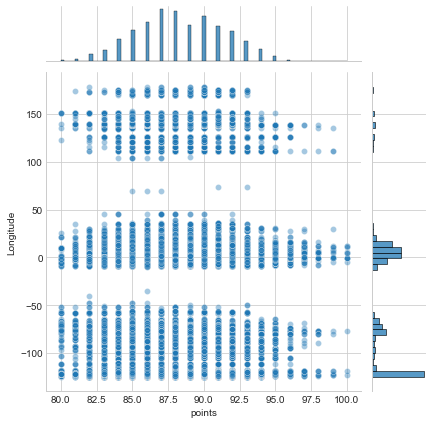

In [71]:
sns.jointplot(eda.points,eda.Longitude, alpha=0.4);